Define paths

In [1]:
#############
###paths#####
#############
import sys
import os

from importlib_metadata import distribution
pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
sys.path.append(modellingpath + '/lib')
#############

from numerical.cn_plot import plot1D, surfpattern2
# from numerical.countPeaksAnalysisFunctions import countPeaks
# from numerical.fourierAnalysisFunctions import entropyFunction
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


Define variables and upload data for figures

In [2]:
circuit_n='turinghill'
variant= 0
n_species=2
mechanism='edgegrowth2'
L=500; x_gridpoints=1; J=L*x_gridpoints;I=J 
T=3000; t_gridpoints = 5; N=T*t_gridpoints #Number of timepoints <below 3 is bad if x_gridpoints=1
boundaryCoeff=2;rate=0.1
parID = 118194
filename= lambda mechanism, parID: 'circuit%s_variant%s_bc%s_%s_rate%s_ID%s_L%r_J%r_T%r_N%r'%(circuit_n,variant,boundaryCoeff, mechanism,rate,parID,L,J,T,N)
# filename(mechanism,1)
parID_list = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/simulation/parID_list_%s.pkl'%(circuit_n,mechanism,filename(mechanism,'x')), 'rb'))
parID = parID_list[1]
U = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/simulation/2Dfinal_%s.pkl'%(circuit_n,mechanism,filename(mechanism, parID)), 'rb'))


Plot solution U with peaks

In [3]:
def countPeaks(U,U_record, showPlot1D=True, showSurfPattern=True):
    peaks = [0,0]
    peaks[0], _ = find_peaks(U[0], prominence=0.1)
    peaks[1], _ = find_peaks(U[1], prominence=0.1)
    if showPlot1D == True:
        plot1D(U,plotPeaks=True, peaks=peaks)
    if showSurfPattern==True:
        dx = float(L)/float(J)
        x_grid = np.array([j*dx for j in range(J)])
        record_every_x_hours = 10
        reduced_t_grid = np.arange(0,T,record_every_x_hours)     
        surfpattern2(U_record, [x_grid, reduced_t_grid],morphogen=[0,1],growth='linear',rate=0.1)
    return peaks



In [4]:



def varPeakDist(U, showplot1D=True,printVar=True):
    peaks = countPeaks(U, showplot1D=showplot1D)
    #calculate distance between peaks
    peak0 = peaks[0]
    #calculate distance between peaks in peak0
    var=[0,0]
    for count,peak in enumerate(peaks):
        if len(peak)>1:
            peak_dist = [np.linalg.norm(peak[i]-peak[i+1]) for i in range(len(peak)-1)]
            peak_dist = peak_dist/np.sum(peak_dist)
            var[count] = np.var(peak_dist)
        else:
            var[count] = 1
    if printVar==True:
        print(var)

    return var

1251569.4


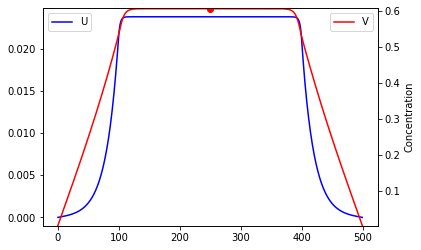

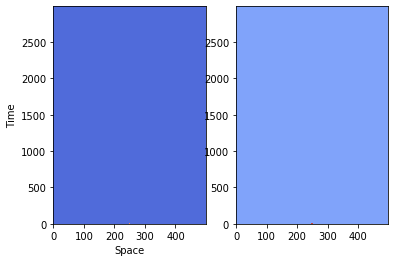

[0, 1]
1282460.3


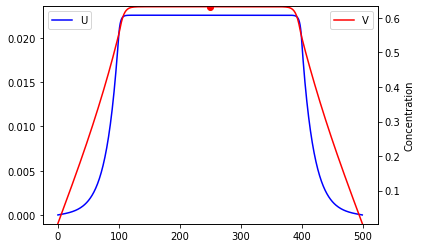

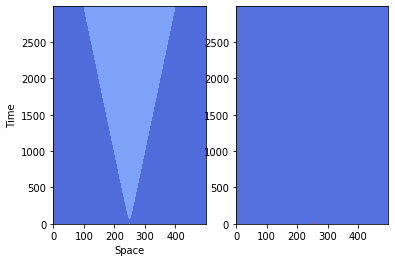

[0, 1]
130517.2


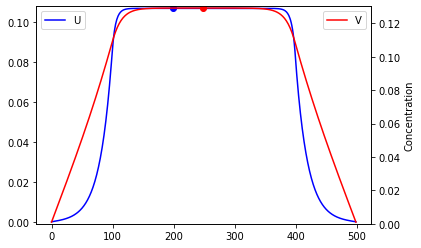

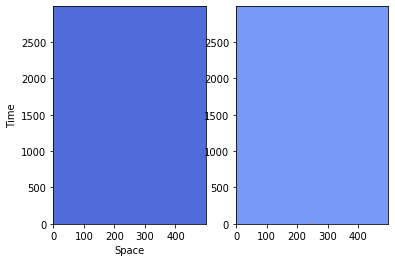

[1, 1]
1365378.2


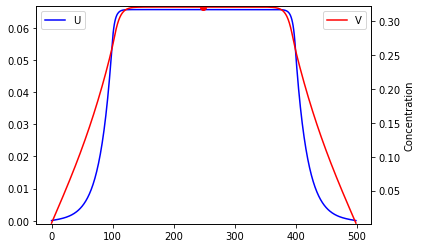

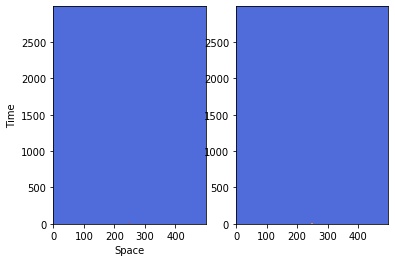

[0, 1]
1826994.2


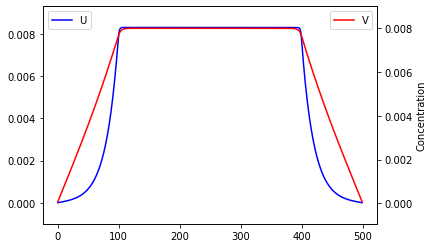

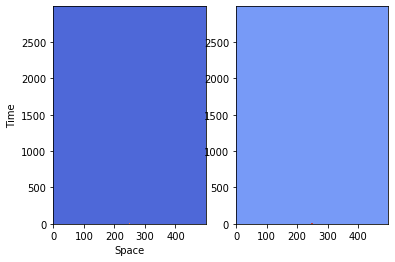

[0, 0]
1710204.2


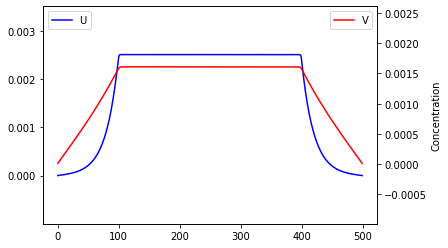

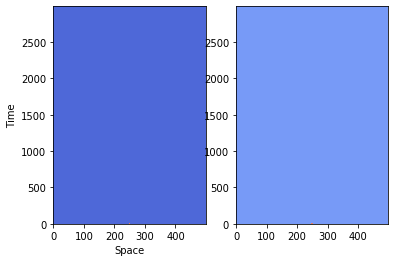

[0, 0]
135128.1


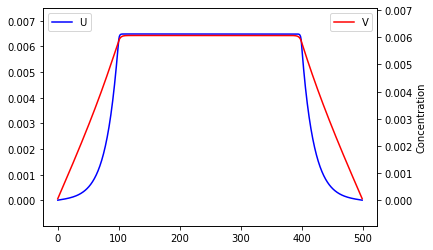

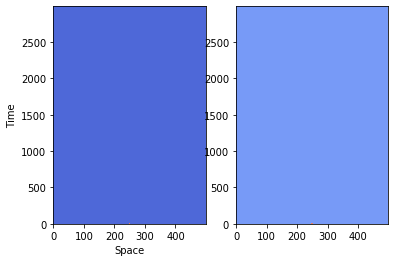

[0, 0]
1133916.0


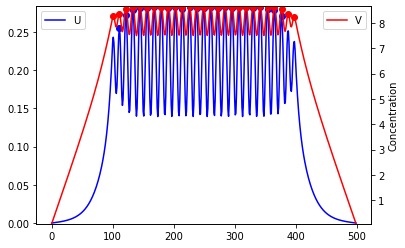

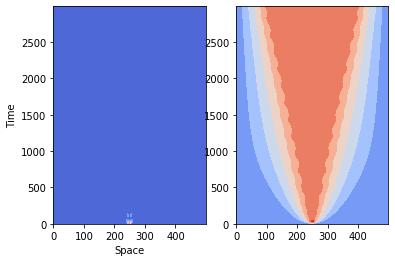

[24, 27]
peaks!!!
1808247.2


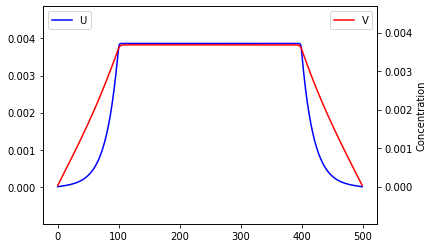

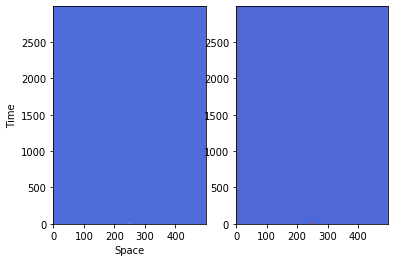

[0, 0]
742006.2


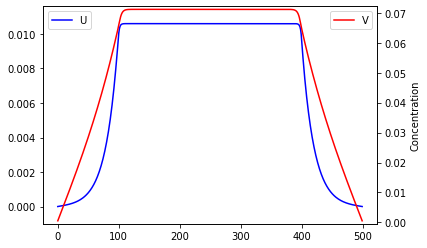

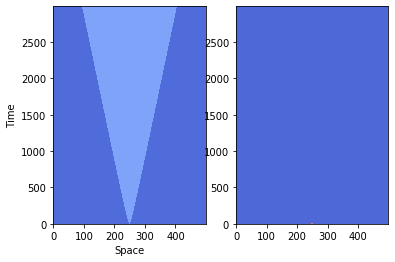

[0, 0]
1695603.2


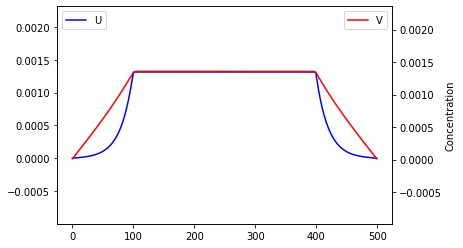

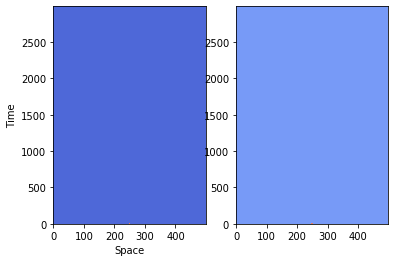

[0, 0]
862004.2


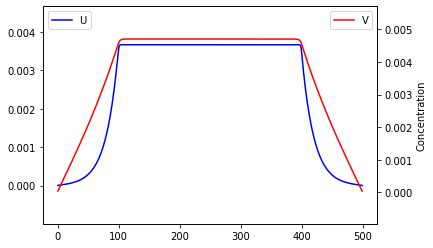

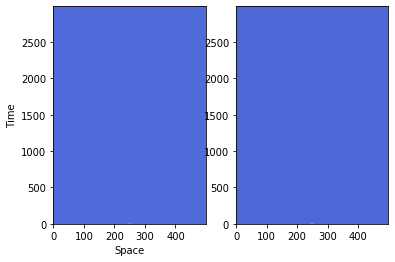

[0, 0]
1121752.2


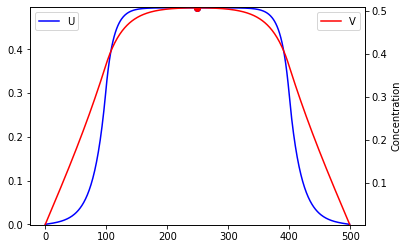

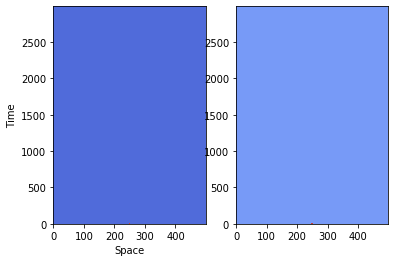

[1, 1]
1706579.2


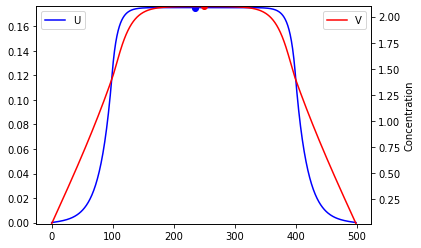

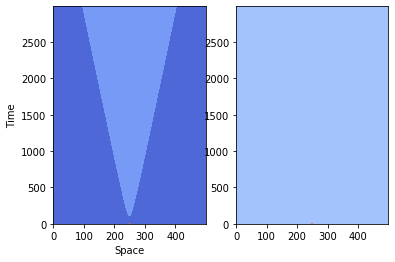

[1, 1]
1363184.1


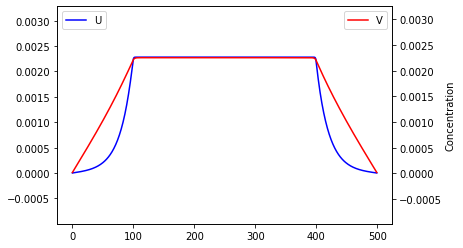

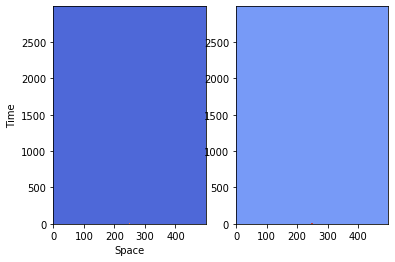

[0, 0]
360416.1


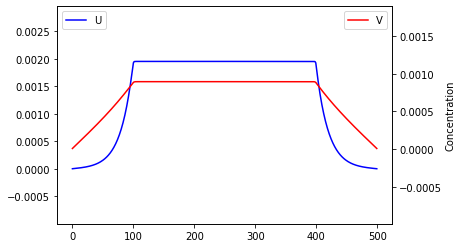

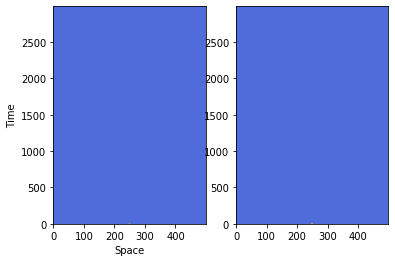

[0, 0]
1869288.0


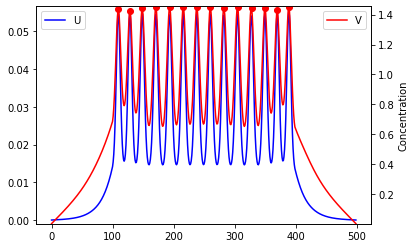

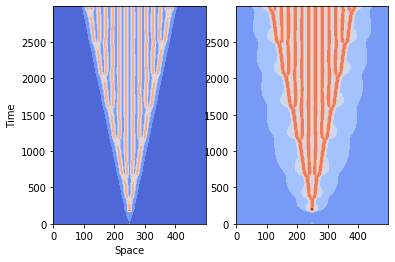

[0, 14]
1814923.2


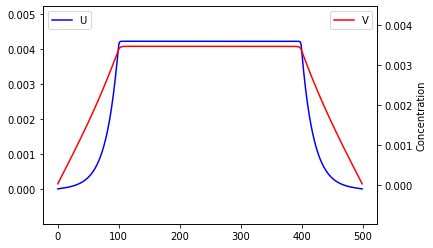

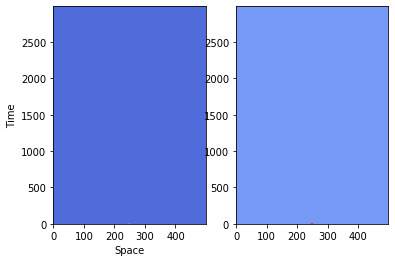

[0, 0]
472883.2


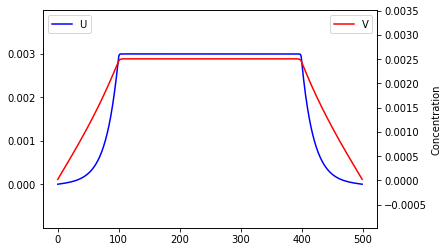

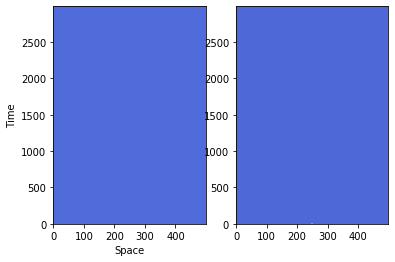

[0, 0]
546109.1


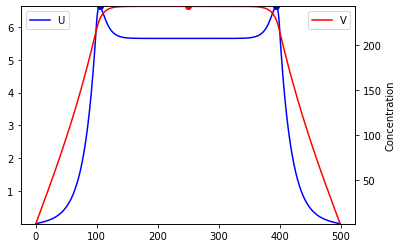

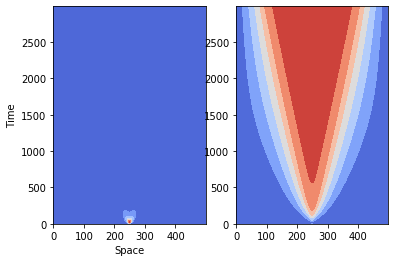

[2, 1]
peaks!!!
486068.2


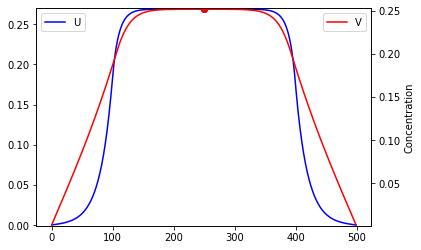

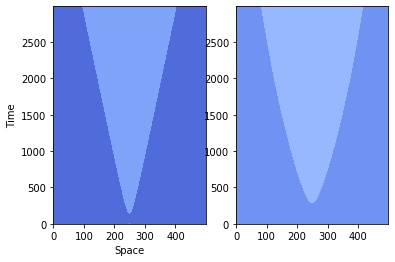

[1, 1]
350981.4


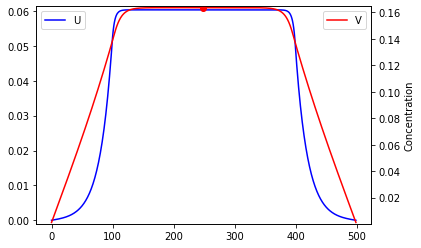

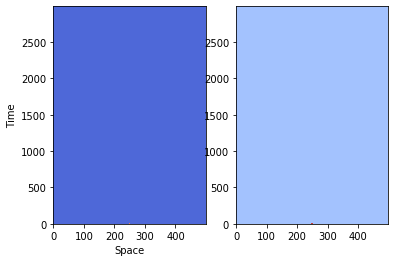

[0, 1]
1271426.4


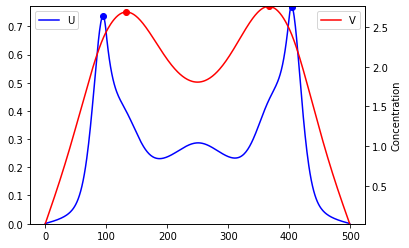

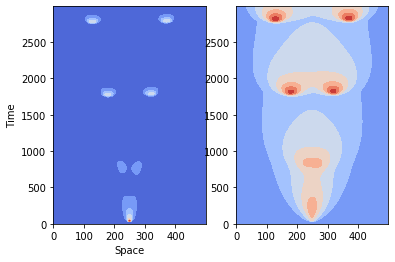

[2, 2]
peaks!!!
1809921.2


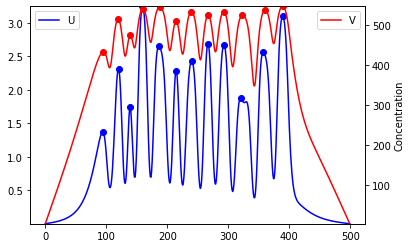

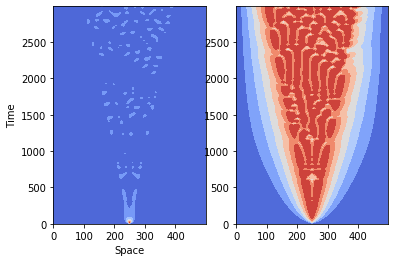

[12, 12]
peaks!!!
1511110.2


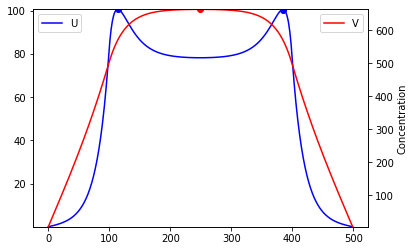

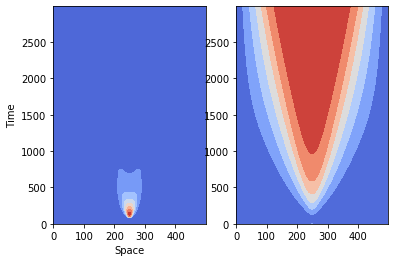

[2, 1]
peaks!!!
118941.0


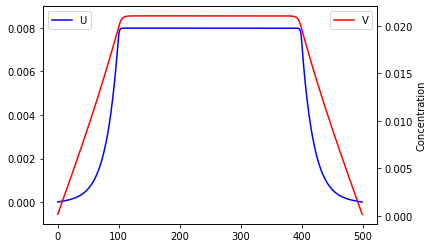

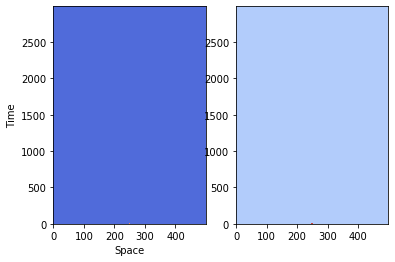

[0, 0]
1874504.1


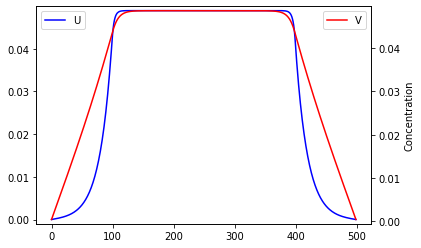

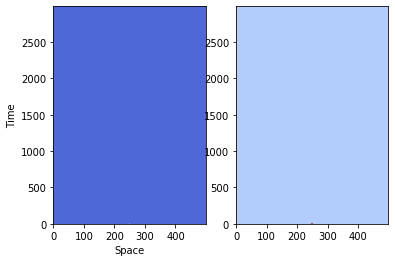

[0, 0]
1195022.4


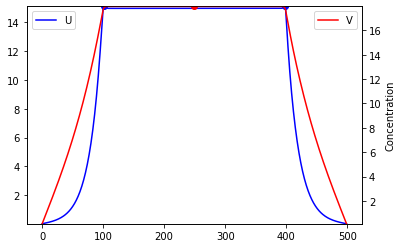

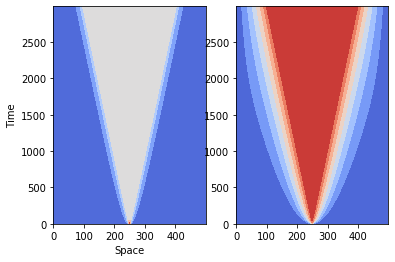

[2, 1]
peaks!!!
1690913.2


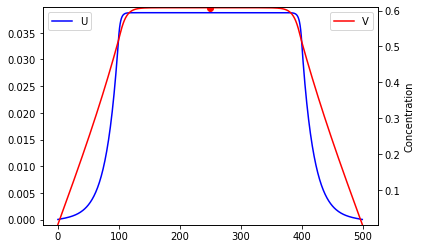

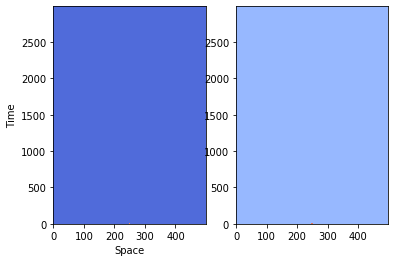

[0, 1]
351953.1


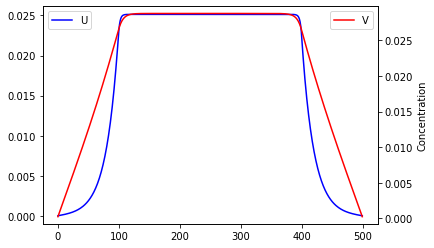

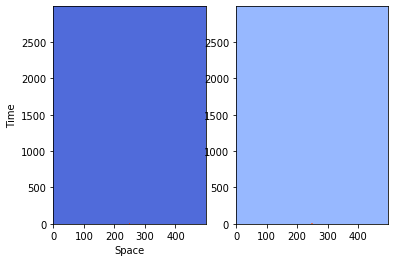

[0, 0]
1591223.2


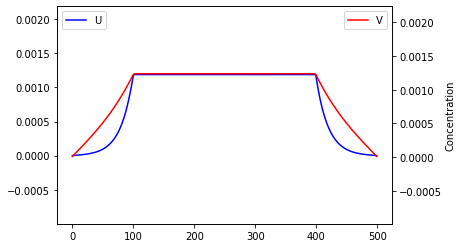

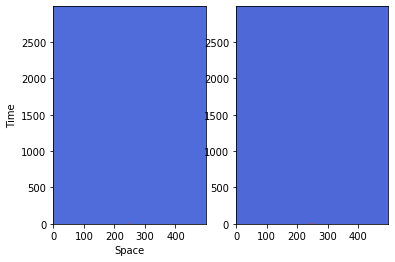

[0, 0]


In [5]:
for parID in parID_list:
    print(parID)
    U = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/simulation/2Dfinal_%s.pkl'%(circuit_n,mechanism,filename(mechanism,parID)), 'rb'))
    U_record = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/simulation/2Drecord_%s.pkl'%(circuit_n,mechanism,filename(mechanism,parID)), 'rb'))
    peaks = countPeaks(U, U_record)
    print([len(peak) for peak in peaks])
    if len(peaks[0]) >1:
        print('peaks!!!')


In [6]:
parID=parID_list[0]
U = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/simulation/2Dfinal_%s.pkl'%(circuit_n,mechanism,filename(mechanism,parID)), 'rb'))
# entropy = entropyPeakDist(U,plotHist=False)
var=varPeakDist(U)


TypeError: countPeaks() got an unexpected keyword argument 'showplot1D'

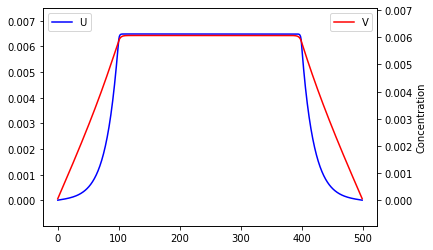

[1, 1]


In [ ]:
parID=parID_list[6]
U = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/simulation/2Dfinal_%s.pkl'%(circuit_n,mechanism,filename(mechanism,parID)), 'rb'))
# entropy = entropyPeakDist(U,plotHist=False)
var=varPeakDist(U)


In [ ]:
parID=30997
U = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/data/2Dfinal_%s.pkl'%(circuit_n,mechanism,filename(parID)), 'rb'))
var=varPeakDist(U)


TypeError: <lambda>() missing 1 required positional argument: 'parID'

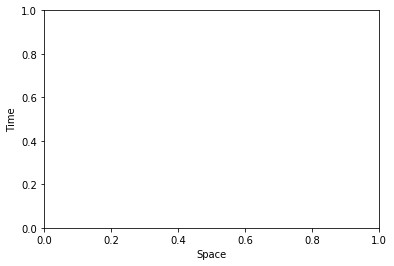

[1, 1]


In [ ]:
parID=1
U = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/data/2Dfinal_%s.pkl'%(circuit_n,mechanism,filename(parID)), 'rb'))
var=varPeakDist(U)
